## SuperDataScience Podcast NLP Analysis

### Notebook# 7: Sentiment Analysis

<div>
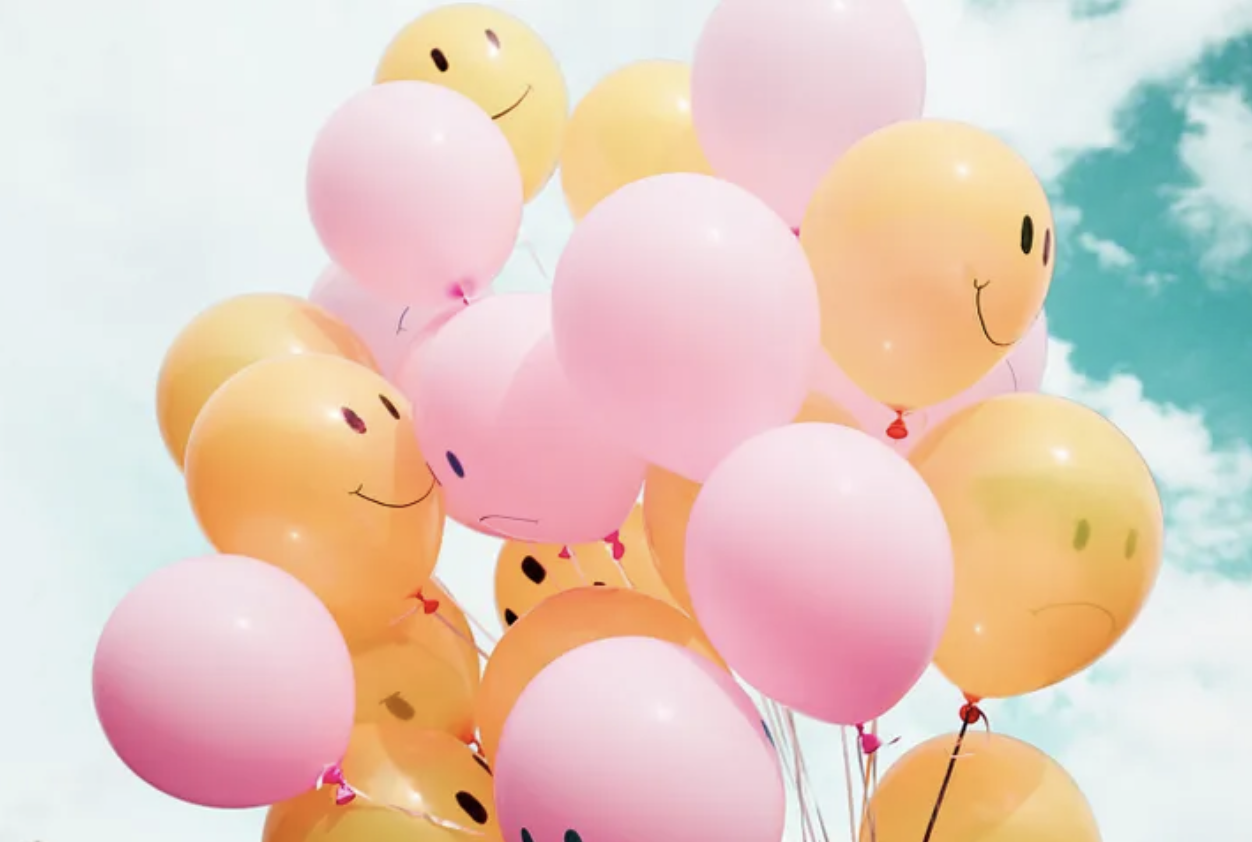
</div>

In [1]:
import pandas as pd
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Loading Spacy English language model and adding TextBlob to pipeline
nlp = spacy.load("en_core_web_sm")
nlp.components
nlp.add_pipe("spacytextblob")

In [ ]:
sds_data = pd.read_csv('../data/sds_ds_text.csv')

In [ ]:
sds_data.head(2)

### Sentiment Analysis for datascience relevant episodes

In [ ]:
# Function to calculate sentiment polarity
def sentiment_analysis(text):
    global sds_data
    
    if isinstance(text, float): # added this if statement because due to [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
        return 0.0  # Return neutral sentiment for float values
    doc = nlp(text)
    polarity = doc._.blob.polarity
    return polarity

# Function to calculate sentiment polarity
def subjectivity_analysis(text):
    global sds_data
    
    if isinstance(text, float): # added this if statement because due to [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
        return 0.0  # Return neutral sentiment for float values
    doc = nlp(text)
    subjectivity = doc._.blob.subjectivity
    return subjectivity

# Function to calculate sentiment polarity
def assessment_analysis(text):
    global sds_data
    
    if isinstance(text, float): # added this if statement because due to [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
        return 0.0  # Return neutral sentiment for float values
    doc = nlp(text)
    assessment = doc._.assessments
    return assessment


In [ ]:
sds_data['sentiments'] = sds_data['episode_split_text'].apply(sentiment_analysis)
sds_data['subjectivity'] = sds_data['episode_split_text'].apply(subjectivity_analysis)
sds_data['assessment'] = sds_data['episode_split_text'].apply(assessment_analysis)

In [ ]:
# Function to divide sentiments in 5 categories
def getAnalysis(score):
    if score < -0.5:
        return "Highly Negative"
    elif score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    elif score > 0.5:
        return "Highly Positive"
    else:
        return "Positive"
    
sds_data['result_score'] = sds_data['sentiments'].apply(getAnalysis)

In [ ]:
sds_data.to_csv('../data/sds_ds_sentiments.csv', index = False)

### Sentiment Analysis for non-datascience relevant episodes

In [ ]:
sds_non_data = pd.read_csv('../data/sds_ds_text.csv')

In [ ]:
sds_non_data['sentiments'] = sds_non_data['episode_split_text'].apply(sentiment_analysis)
sds_non_data['subjectivity'] = sds_non_data['episode_split_text'].apply(subjectivity_analysis)
sds_non_data['assessment'] = sds_non_data['episode_split_text'].apply(assessment_analysis)
sds_non_data['result_score'] = sds_non_data['sentiments'].apply(getAnalysis)

In [ ]:
sds_non_data.to_csv('../data/sds_nds_sentiments.csv', index = False)

### Sentiments EDA

In [ ]:
sds_data = pd.read_csv('../data/sds_ds_sentiments.csv')

In [ ]:
sds_data.head(2)

In [ ]:
# Extract the words from assessment column
sds_data["words"] = sds_data["assessment"].str.findall("\['([a-z]+)'\]")

In [ ]:
# Removing the episode with no guest present for talk
sds_data = sds_data[~(((sds_data['guest_name'] == ' Kirill Eremenko ') & (sds_data['host_episode'] == 'Kirill Eremenko')) | ((sds_data['guest_name'] == ' Jon Krohn ') & (sds_data['host_episode'] == 'Jon Krohn')))]

# Separting the episode where former host or current host came as a guest to be included in guest sentiments frame later
Krohn = sds_data[(sds_data['host_episode'] == 'Kirill Eremenko') & (sds_data['guest_name'] == ' Jon Krohn ')]
Kirill = sds_data[(sds_data['host_episode'] == 'Jon Krohn' ) & (sds_data['guest_name'] == ' Kirill Eremenko ')]

# Removing Separting the episode where former host or current host came as a guest to be included in guest sentiments frame later
sds_data = sds_data[~(((sds_data['host_episode'] == 'Jon Krohn' ) & (sds_data['guest_name'] == ' Kirill Eremenko ')) | ((sds_data['host_episode'] == 'Kirill Eremenko') & (sds_data['guest_name'] == ' Jon Krohn ')))]

In [ ]:
# Creating separate datframe for host sentiments

host_sentiments = sds_data[(sds_data['speaker'] == 'Kirill Eremenko') | (sds_data['speaker'] == 'Kirill') | (sds_data['speaker'] == 'Jon Krohn')]
jon_host = Kirill[Kirill['speaker'] == 'Jon Krohn']
Kirill_host = Krohn[Krohn['speaker'] == 'Kirill Eremenko']

# Add the episodes back to host_sentiments dataframe where former host or current host came were guest
host_sentiments = pd.concat([host_sentiments, Kirill_host])
host_sentiments = pd.concat([host_sentiments, jon_host])

host_sentiments = host_sentiments.sort_values('episode_number').reset_index(drop = True)

In [ ]:
# Creating separate datframe for guest sentiments

guest_sentiments = sds_data[~((sds_data['speaker'] == 'Kirill Eremenko') | (sds_data['speaker'] == 'Kirill') | (sds_data['speaker'] == 'Jon Krohn'))]
Kirill_guest = Kirill[Kirill['speaker'] == 'Kirill Eremenko']
jon_guest = Krohn[Krohn['speaker'] == 'Jon Krohn']
guest_sentiments = pd.concat([guest_sentiments, Kirill_guest])
guest_sentiments = pd.concat([guest_sentiments, jon_guest])

guest_sentiments = guest_sentiments.sort_values('episode_number').reset_index(drop = True)

In [ ]:
host_sentiments.to_csv('../data/host_sentiments.csv', index = False)
guest_sentiments.to_csv('../data/guest_sentiments.csv', index = False)

In [2]:
host_sentiments = pd.read_csv('../data/host_sentiments.csv')
guest_sentiments = pd.read_csv('../data/guest_sentiments.csv')

In [3]:
guest_mean_sentiment = pd.DataFrame(guest_sentiments.groupby(['episode_year', 'class'])['sentiments'].mean()).reset_index()

In [4]:
guest_sentiments['result_score'].value_counts()

Positive           18567
Neutral             4565
Negative            2341
Highly Positive     1060
Highly Negative       83
Name: result_score, dtype: int64

In [5]:
guest_value = pd.DataFrame(guest_sentiments.groupby(['class'])['result_score'].value_counts().reset_index(name = 'count'))
guest_value

class     result_score  count
0              Artificial Intelligence         Positive   2471
1              Artificial Intelligence          Neutral    551
2              Artificial Intelligence         Negative    483
3              Artificial Intelligence  Highly Positive    125
4              Artificial Intelligence  Highly Negative     16
..                                 ...              ...    ...
65                         Programming  Highly Negative      5
66  Programming and Data Visualization         Positive    173
67  Programming and Data Visualization          Neutral     35
68  Programming and Data Visualization         Negative     19
69  Programming and Data Visualization  Highly Positive      6

[70 rows x 3 columns]

In [6]:
pivot_guest_sentiments = guest_value.pivot(index='class', columns='result_score', values='count')
pivot_guest_sentiments

result_score                                        Highly Negative  \
class                                                                 
Artificial Intelligence                                        16.0   
Artificial Intelligence and Deep Learning                       NaN   
Blockchain                                                      3.0   
Data Science                                                   32.0   
Data Science Career                                             1.0   
Data Science and Productivity                                   NaN   
Data Visualization                                              3.0   
Database                                                        NaN   
Deep Learning                                                   1.0   
Machine Learning                                               14.0   
Machine Learning and Artificial Intelligence                    4.0   
Machine Learning and Deep Learning                              NaN   
Machine Learning, Artificial Intelligence and D...              4.0   
Programming                                                     5.0   
Programming and Data Visualization                              NaN   

result_score                                        Highly Positive  Negative  \
class                                                                           
Artificial Intelligence                                       125.0     483.0   
Artificial Intelligence and Deep Learning                      11.0      52.0   
Blockchain                                                     22.0      23.0   
Data Science                                                  337.0     632.0   
Data Science Career                                            33.0      60.0   
Data Science and Productivity                                   1.0       5.0   
Data Visualization                                            105.0     150.0   
Database                                                       23.0      23.0   
Deep Learning                                                  13.0      25.0   
Machine Learning                                              206.0     442.0   
Machine Learning and Artificial Intelligence                   57.0     151.0   
Machine Learning and Deep Learning                             42.0      73.0   
Machine Learning, Artificial Intelligence and D...             17.0      52.0   
Programming                                                    62.0     151.0   
Programming and Data Visualization                              6.0      19.0   

result_score                                        Neutral  Positive  
class                                                                  
Artificial Intelligence                               551.0    2471.0  
Artificial Intelligence and Deep Learning              82.0     311.0  
Blockchain                                            166.0     205.0  
Data Science                                         1291.0    5967.0  
Data Science Career                                   149.0     507.0  
Data Science and Productivity                          11.0      60.0  
Data Visualization                                    401.0    1492.0  
Database                                               79.0     371.0  
Deep Learning                                          19.0     147.0  
Machine Learning                                      892.0    3484.0  
Machine Learning and Artificial Intelligence          293.0     989.0  
Machine Learning and Deep Learning                    216.0     776.0  
Machine Learning, Artificial Intelligence and D...     85.0     391.0  
Programming                                           295.0    1223.0  
Programming and Data Visualization                     35.0     173.0

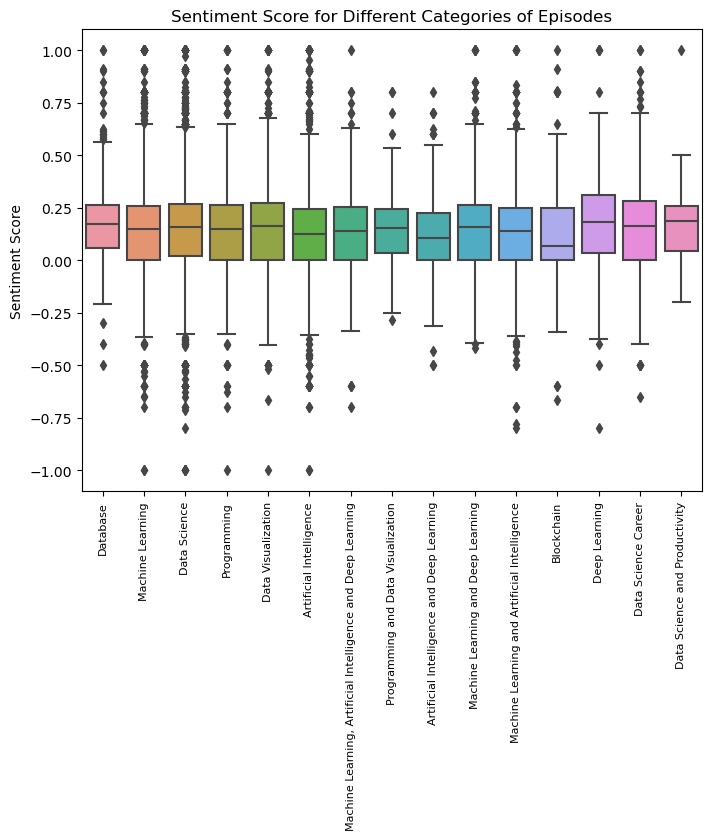

In [7]:
# Boxplot for distribution of sentiments in each category
plt.figure(figsize = (8,6))
sns.boxplot(data = guest_sentiments, x ='class', y ='sentiments')
plt.ylabel('Sentiment Score')
plt.xlabel('')
plt.xticks(rotation = 90, fontsize = 8)
plt.title('Sentiment Score for Different Categories of Episodes');

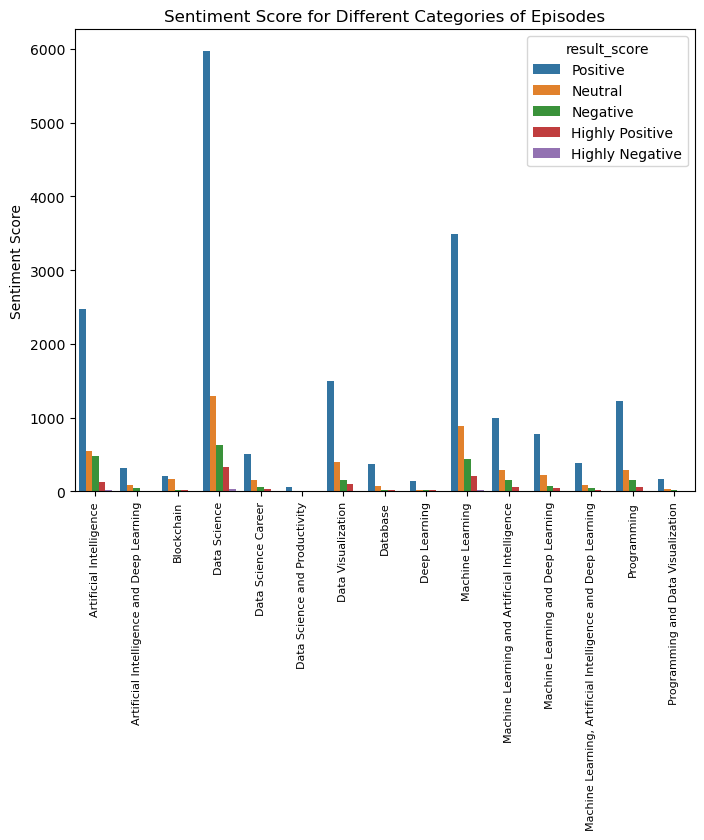

In [8]:
# Bar plot for distribution of sentiments in each category
plt.figure(figsize=(8, 6))
sns.barplot(guest_value, x = 'class', y = 'count', hue = 'result_score')
plt.ylabel('Sentiment Score')
plt.xlabel('')
plt.xticks(rotation = 90, fontsize = 8)
plt.title('Sentiment Score for Different Categories of Episodes');

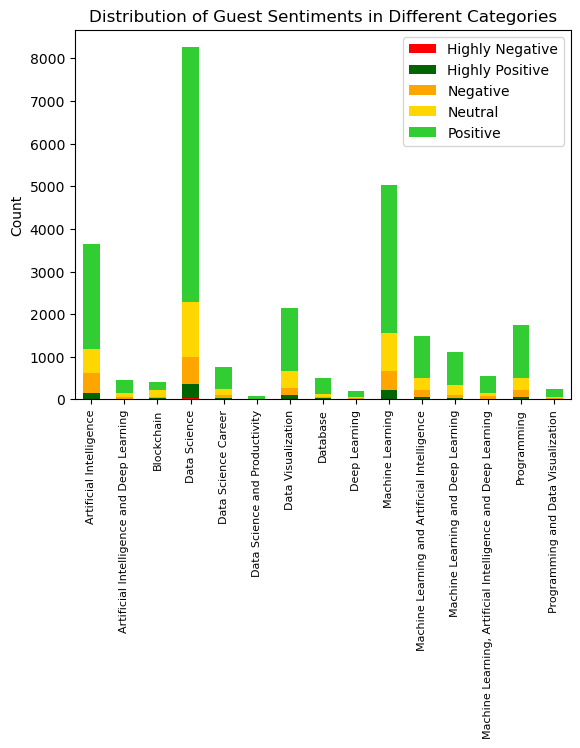

In [9]:
# Stacked bar plot for distribution of sentiments in each category
colors = {
    'Positive': 'limegreen',
    'Neutral': 'gold',
    'Negative': 'orange',
    'Highly Positive': 'darkgreen',
    'Highly Negative': 'red'
}
pivot_guest_sentiments.plot(kind='bar', stacked=True, color = colors)
plt.ylabel('Count')
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(rotation = 90, fontsize = 8)
plt.title('Distribution of Guest Sentiments in Different Categories', fontsize = 12)
plt.legend(bbox_to_anchor =(1.0, 1.0));

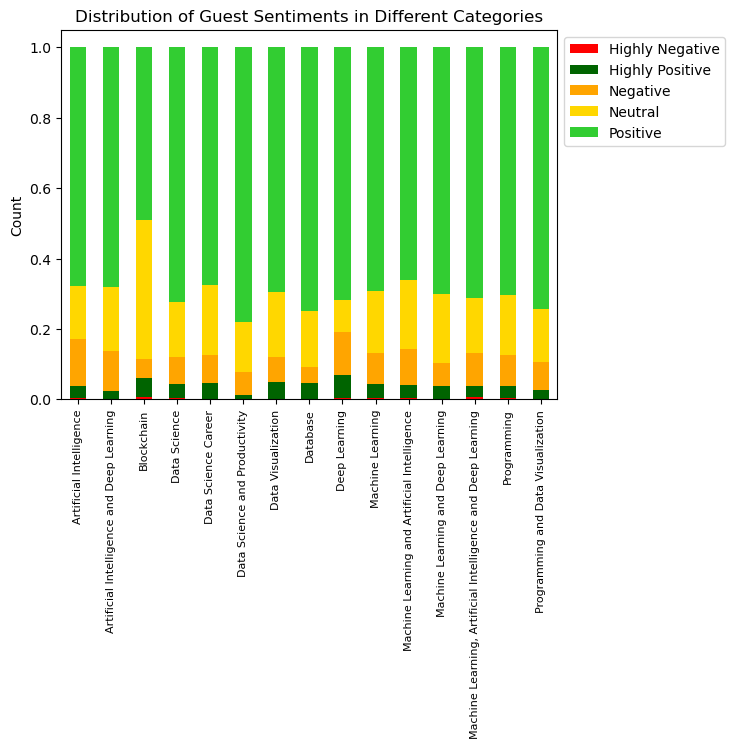

In [10]:
# 100% Stacked bar plot for distribution of sentiments in each category
prop_pivot_guest_sentiments = pivot_guest_sentiments.div(pivot_guest_sentiments.sum(axis=1), axis=0)
colors = {
    'Positive': 'limegreen',
    'Neutral': 'gold',
    'Negative': 'orange',
    'Highly Positive': 'darkgreen',
    'Highly Negative': 'red'
}
prop_pivot_guest_sentiments.plot(kind='bar', stacked=True, color= colors)
plt.ylabel('Count')
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(rotation = 90, fontsize = 8)
plt.title('Distribution of Guest Sentiments in Different Categories', fontsize = 12)
plt.legend(bbox_to_anchor =(1.0, 1.0));

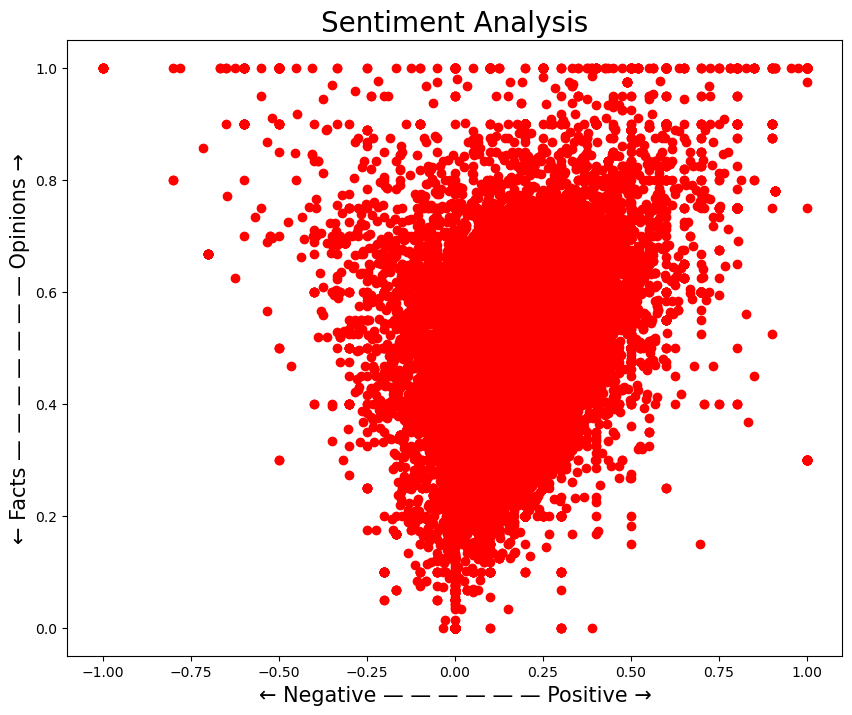

In [22]:
# Scatter plot for polarity vs subjectivity score
plt.rcParams['figure.figsize'] = [10, 8]

for index, episode_split_text in enumerate(guest_sentiments.index):
    x = guest_sentiments.sentiments.loc[episode_split_text]
    y = guest_sentiments.subjectivity.loc[episode_split_text]
    plt.scatter(x, y, color = 'red')
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize = 15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize = 15)
plt.show()

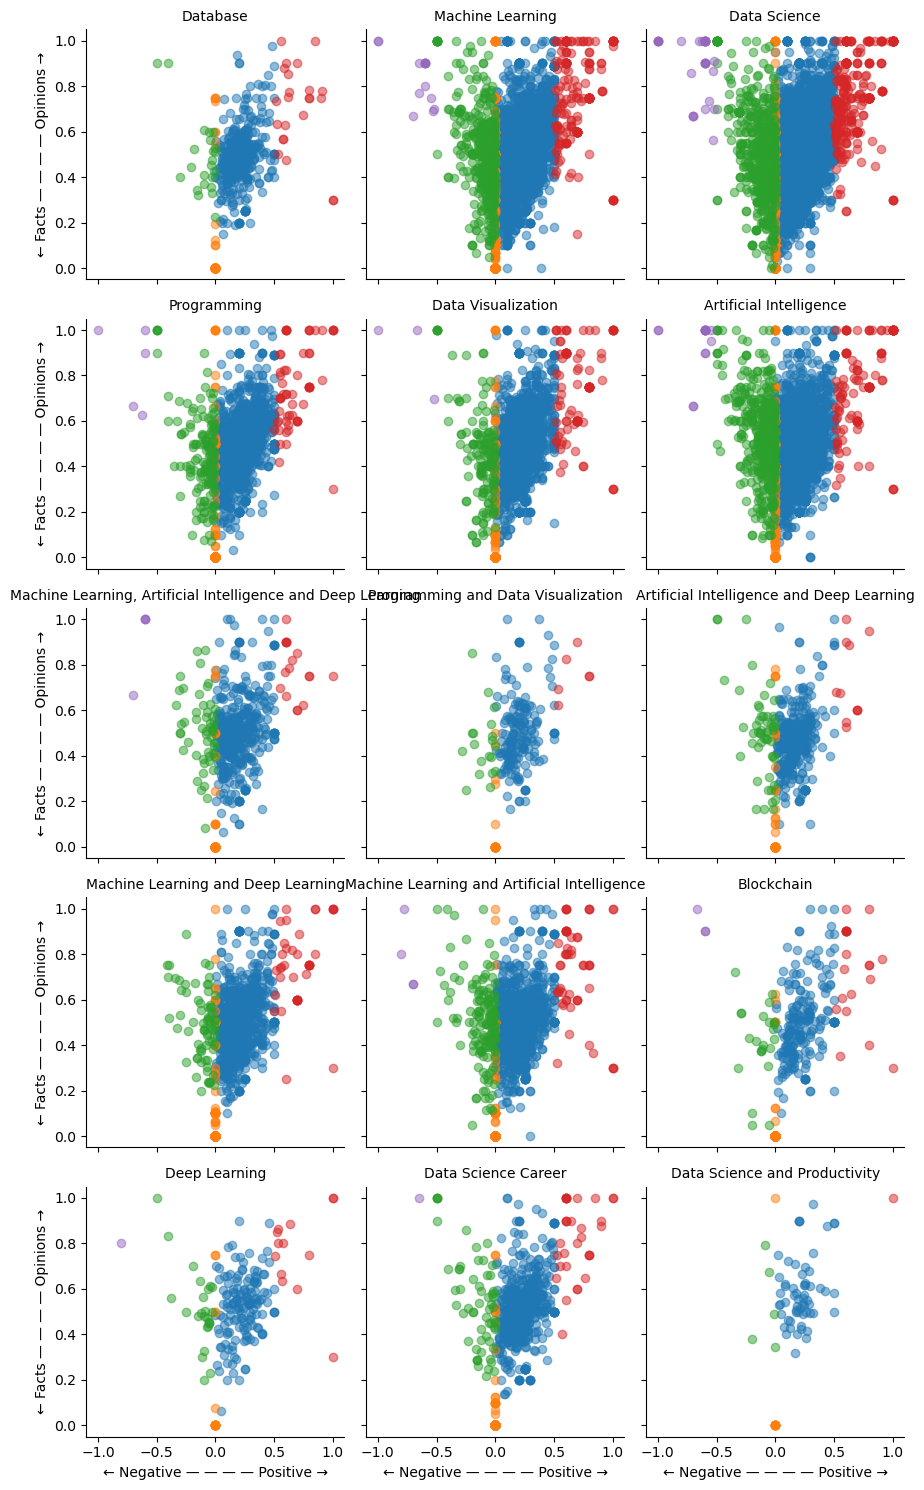

In [11]:
# Plot for Polarity Vs Subjectivity score for different categories of datascience episodes
grid = sns.FacetGrid(guest_sentiments, col = 'class', hue = "result_score", col_wrap = 3 )
grid.map(plt.scatter, 'sentiments', 'subjectivity', alpha = 0.5)
grid.set_titles('{col_name}', fontsize = 4)
grid.set_axis_labels('← Negative — — — — Positive →', '← Facts — — — — Opinions →')
plt.show()

### Looking for guest sentiments as the episode progressed

In [12]:
# Preparing dataframe for episodes in deep learning
deep_learning = guest_sentiments[guest_sentiments['class'] == 'Deep Learning']

In [13]:
List = deep_learning['result_score'].unique()
fig = px.bar(deep_learning, y='sentiments', hover_data = ['words'], width=1100, height=600, color = 'result_score')
fig.update_layout(title_text= 'SDS:453, Big Global Problems Worth Solving with Machine Learning',  title_x=0.5)
fig.update_xaxes(title='Time Stamp', visible= True, showticklabels= False)
fig.update_yaxes(title='Guest Sentiment Polarity', visible= True, showticklabels= True)
fig.update_layout(legend_title = 'categories', showlegend = False, font=dict(size= 10))
fig.show()
fig.write_html("E453_sentiments.html")

<IPython.core.display.Javascript object>

In [14]:
# Preparing dataframe of episodes in Artificial Integlligence
AI = guest_sentiments[guest_sentiments['class'] == 'Artificial Intelligence']
AI_grouped = pd.DataFrame(AI.groupby(["episode_number", "episode_name"])['result_score'].value_counts().reset_index(name = 'count'))

In [15]:
# Plotting episode SDS:425
ep425 = guest_sentiments[guest_sentiments['episode_number'] == 425]
fig = px.bar(ep425, y='sentiments', hover_data = ['words'], width=1100, height=600, color = 'result_score')
fig.update_layout(title_text= 'SDS:425, The Past, Present, and Future of AI Services',  title_x=0.5)
fig.update_xaxes(title='Time Stamp', visible= True, showticklabels= False)
fig.update_yaxes(title='Guest Sentiment Polarity', visible= True, showticklabels= True)
fig.update_layout(legend_title = 'categories', showlegend = False, font=dict(size= 10))
fig.show()
fig.write_html("E425_sentiments.html")

<IPython.core.display.Javascript object>

In [16]:
# Plotting episode SDS:565
ep565 = guest_sentiments[guest_sentiments['episode_number'] == 565]
fig = px.bar(ep565, y='sentiments', hover_data = ['words'], width=1100, height=600, color = 'result_score')
fig.update_layout(title_text= 'SDS:565, AGI',  title_x=0.5)
fig.update_xaxes(title='Time Stamp', visible= True, showticklabels= False)
fig.update_yaxes(title='Guest Sentiment Polarity', visible= True, showticklabels= True)
fig.update_layout(legend_title = 'categories', showlegend = False, font=dict(size= 10))
fig.show()
fig.write_html("E565_sentiments.html")

<IPython.core.display.Javascript object>